In [40]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from markupsafe import Markup #Caution: this may need to be updated in the condas env being used

In [3]:
# Load the SF_Crime_Data_from_2018_to_Present.csv CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("SF_Crime_Data_from_2018_to_Present.csv")

# Display sample data
city_data_df.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),NaN,NaN,6.0,4.0
783434,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,1/23/2021 12:45,9.987897e+10,998789,210051968,210231480.0,...,Out of SF,Bayview Hunters Point,10.0,37.729910,-122.397177,POINT (-122.39717687851248 37.72990988256753),NaN,NaN,9.0,2.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),NaN,NaN,1.0,10.0
783436,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/4/2021 18:13,1.030000e+11,1030988,216055213,NaN,...,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783437,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,8/10/2021 13:10,1.060000e+11,1058884,210508088,212221621.0,...,Tenderloin,Tenderloin,5.0,37.783933,-122.412595,POINT (-122.41259527758581 37.7839325760642),1.0,NaN,10.0,5.0


In [4]:
# Count NaN values in each column of city_data_df
nan_count_per_column = city_data_df.isna().sum()

# Count total NaN values in the entire city_data_df DataFrame
total_nan_count = city_data_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                    0
Incident Date                                        0
Incident Time                                        0
Incident Year                                        0
Incident Day of Week                                 0
Report Datetime                                      0
Row ID                                               0
Incident ID                                          0
Incident Number                                      0
CAD Number                                      176929
Report Type Code                                     0
Report Type Description                              0
Incident Code                                        0
Incident Category                                  699
Incident Subcategory                               699
Incident Description                                 0
Resolution                                           0
Intersection                               

In [5]:
# Print column names of city_data_df
print("Column names: ")
print(city_data_df.columns.tolist())

Column names: 
['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'Police District', 'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude', 'Point', 'Civic Center Harm Reduction Project Boundary', 'HSOC Zones as of 2018-06-05', 'Current Supervisor Districts', 'Current Police Districts']


In [6]:
# Remove rows where 'Police District' is 'Out of SF' in the original city_data_df DataFrame
city_data_df.drop(city_data_df[city_data_df['Police District'] == 'Out of SF'].index, inplace=True)

In [7]:
city_data_df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
0,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),NaN,NaN,9.0,2.0
1,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),NaN,NaN,9.0,2.0
2,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
3,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
4,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),NaN,NaN,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783432,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,7/14/2020 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),NaN,NaN,6.0,4.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),NaN,NaN,1.0,10.0
783436,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/4/2021 18:13,1.030000e+11,1030988,216055213,NaN,...,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Count NaN values in each column city_data_df AFTER REMOVING Out of SF in Police Disctrict column
# city_data_df.drop(city_data_df[city_data_df['Police District'] == 'Out of SF']
nan_count_per_column = city_data_df.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = city_data_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)


NaN count per column:
Incident Datetime                                    0
Incident Date                                        0
Incident Time                                        0
Incident Year                                        0
Incident Day of Week                                 0
Report Datetime                                      0
Row ID                                               0
Incident ID                                          0
Incident Number                                      0
CAD Number                                      162166
Report Type Code                                     0
Report Type Description                              0
Incident Code                                        0
Incident Category                                  680
Incident Subcategory                               680
Incident Description                                 0
Resolution                                           0
Intersection                               

## Computer Aided Dispatch (CAD) column "CAD Number" has 162166 NaN entries
We are going to fill that NaN entries with zero so we can still count Computer Aided Dispatch entries if we want to later.

In [9]:
# Computer Aided Dispatch (CAD) column "CAD Number" with NaN will be filled with "0"
city_data_df['CAD Number'].fillna(0, inplace=True)

## Count NaN values in each column AFTER filling CAD Number NaN entries has been filled with '0'

See how CAD Number column now has zero NaN entries :-)

In [10]:
# Count NaN values in each column AFTER filling CAD Number NaN entries 
# has been filled with '0'
nan_count_per_column = city_data_df.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = city_data_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                    0
Incident Date                                        0
Incident Time                                        0
Incident Year                                        0
Incident Day of Week                                 0
Report Datetime                                      0
Row ID                                               0
Incident ID                                          0
Incident Number                                      0
CAD Number                                           0
Report Type Code                                     0
Report Type Description                              0
Incident Code                                        0
Incident Category                                  680
Incident Subcategory                               680
Incident Description                                 0
Resolution                                           0
Intersection                               

## We will filter out Incident Category with NaN

This will decrease the dataset by 680 Entries. Caveat: these entries are mostly "complaints" about loud noise and/or incidents that **Do Not** require police presence

In [11]:
# Filter out rows where 'Incident Category' is empty
city_data_df = city_data_df.dropna(subset=['Incident Category'])

In [12]:
# Count NaN values in each column AFTER getting rid of 680 BLANK 'Incident Categories' entries

nan_count_per_column = city_data_df.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = city_data_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                    0
Incident Date                                        0
Incident Time                                        0
Incident Year                                        0
Incident Day of Week                                 0
Report Datetime                                      0
Row ID                                               0
Incident ID                                          0
Incident Number                                      0
CAD Number                                           0
Report Type Code                                     0
Report Type Description                              0
Incident Code                                        0
Incident Category                                    0
Incident Subcategory                                 0
Incident Description                                 0
Resolution                                           0
Intersection                               

## We are going to fill 'Civic Center Harm Reduction Project Boundary' column entries containing NaN with '0' value. 

This will not affect the over all integrity of the dataset.

In [13]:
city_data_df['Civic Center Harm Reduction Project Boundary'].fillna(0, inplace=True)

C:\Users\diaha\AppData\Local\Temp\ipykernel_3764\999809092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data_df['Civic Center Harm Reduction Project Boundary'].fillna(0, inplace=True)


In [14]:
# AFTER filling 'Civic Center Harm Reduction Project Boundary' column entries containing NaN with '0' value
nan_count_per_column = city_data_df.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = city_data_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                    0
Incident Date                                        0
Incident Time                                        0
Incident Year                                        0
Incident Day of Week                                 0
Report Datetime                                      0
Row ID                                               0
Incident ID                                          0
Incident Number                                      0
CAD Number                                           0
Report Type Code                                     0
Report Type Description                              0
Incident Code                                        0
Incident Category                                    0
Incident Subcategory                                 0
Incident Description                                 0
Resolution                                           0
Intersection                               

## We are going to fill 'HSOC Zones as of 2018-06-05' column entries containing NaN with '0' value. 

This will not affect the over all integrity of the dataset.

In [15]:
city_data_df['HSOC Zones as of 2018-06-05'].fillna(0, inplace=True)

C:\Users\diaha\AppData\Local\Temp\ipykernel_3764\3776617433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data_df['HSOC Zones as of 2018-06-05'].fillna(0, inplace=True)


In [16]:
## AFTER filling 'HSOC Zones as of 2018-06-05' column entries containing NaN with '0' value. 
# Count NaN values in each column
nan_count_per_column = city_data_df.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = city_data_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                   0
Incident Date                                       0
Incident Time                                       0
Incident Year                                       0
Incident Day of Week                                0
Report Datetime                                     0
Row ID                                              0
Incident ID                                         0
Incident Number                                     0
CAD Number                                          0
Report Type Code                                    0
Report Type Description                             0
Incident Code                                       0
Incident Category                                   0
Incident Subcategory                                0
Incident Description                                0
Resolution                                          0
Intersection                                    26529
Police

## This is the beginning of the REAL clean up 

In [17]:
# DROPPING ['Intersection'] column.
# This will not affect the overall integrity of the dataset
# moving city_data_df dataframe to city_data_wo_intersection_df dataframe

city_data_wo_intersection_df = city_data_df.drop(columns=['Intersection'])

In [18]:
city_data_wo_intersection_df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
0,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0
1,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0
2,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
3,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
4,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),0.0,0.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783432,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,7/14/2020 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0
783436,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/4/2021 18:13,1.030000e+11,1030988,216055213,0.0,...,Southern,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [19]:
# Count NaN values in each column city_data_wo_intersection_df
nan_count_per_column = city_data_wo_intersection_df.isna().sum()

# Count total NaN values in the entire DataFrame city_data_wo_intersection_df
total_nan_count = city_data_wo_intersection_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                   0
Incident Date                                       0
Incident Time                                       0
Incident Year                                       0
Incident Day of Week                                0
Report Datetime                                     0
Row ID                                              0
Incident ID                                         0
Incident Number                                     0
CAD Number                                          0
Report Type Code                                    0
Report Type Description                             0
Incident Code                                       0
Incident Category                                   0
Incident Subcategory                                0
Incident Description                                0
Resolution                                          0
Police District                                     0
Analys

## Save SF_Crime_Data_from_2018_to_Present_wo_Intersection_Oct_18_220pm.csv

In [20]:
city_data_wo_intersection_df.to_csv("SF_Crime_Data_from_2018_to_Present_wo_Intersection_Oct_18_332pm.csv", index=False, encoding="ISO-8859-1")


## Dropping NaN Longtitude and Latitude entries.

This will decrease the original dataset around 5%


In [21]:
city_data_wo_lon_lat_df = city_data_wo_intersection_df.dropna(subset=['Latitude'])

In [22]:
city_data_wo_lon_lat_df.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
783431,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,9/29/2020 12:29,9.653111e+10,965311,200586298,202731493.0,...,Northern,Western Addition,2.0,37.788280,-122.423594,POINT (-122.42359407328958 37.78827973195545),0.0,0.0,6.0,4.0
783432,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,7/14/2020 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0
783437,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,8/10/2021 13:10,1.060000e+11,1058884,210508088,212221621.0,...,Tenderloin,Tenderloin,5.0,37.783933,-122.412595,POINT (-122.41259527758581 37.7839325760642),1.0,0.0,10.0,5.0


In [23]:
# Count NaN values in each column city_data_wo_lon_lat_df

nan_count_per_column = city_data_wo_lon_lat_df.isna().sum()

# Count total NaN values in the entire DataFrame city_data_wo_lon_lat_df
total_nan_count = city_data_wo_lon_lat_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                 0
Incident Date                                     0
Incident Time                                     0
Incident Year                                     0
Incident Day of Week                              0
Report Datetime                                   0
Row ID                                            0
Incident ID                                       0
Incident Number                                   0
CAD Number                                        0
Report Type Code                                  0
Report Type Description                           0
Incident Code                                     0
Incident Category                                 0
Incident Subcategory                              0
Incident Description                              0
Resolution                                        0
Police District                                   0
Analysis Neighborhood                     

In [24]:
# Save dataset to SF_Crime_Data_from_2018_to_Present_wo_Lon_Lat_Oct_18_335pm.csv

city_data_wo_lon_lat_df.to_csv("SF_Crime_Data_from_2018_to_Present_wo_Lon_Lat_Oct_18_335pm.csv", index=False, encoding="ISO-8859-1")

## More clean up. Dropping rows with NaN 'Current Police District'

In [25]:
city_data_wo_cur_pol_disctrict_df = city_data_wo_lon_lat_df.dropna(subset=['Current Police Districts'])

In [26]:
city_data_wo_cur_pol_disctrict_df.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
783431,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,9/29/2020 12:29,9.653111e+10,965311,200586298,202731493.0,...,Northern,Western Addition,2.0,37.788280,-122.423594,POINT (-122.42359407328958 37.78827973195545),0.0,0.0,6.0,4.0
783432,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,7/14/2020 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0
783437,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,8/10/2021 13:10,1.060000e+11,1058884,210508088,212221621.0,...,Tenderloin,Tenderloin,5.0,37.783933,-122.412595,POINT (-122.41259527758581 37.7839325760642),1.0,0.0,10.0,5.0


In [27]:
# Count NaN values in each column city_data_wo_cur_pol_disctrict_df
nan_count_per_column = city_data_wo_cur_pol_disctrict_df.isna().sum()

# Count total NaN values in the entire DataFrame city_data_wo_cur_pol_disctrict_df
total_nan_count = city_data_wo_cur_pol_disctrict_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                                 0
Incident Date                                     0
Incident Time                                     0
Incident Year                                     0
Incident Day of Week                              0
Report Datetime                                   0
Row ID                                            0
Incident ID                                       0
Incident Number                                   0
CAD Number                                        0
Report Type Code                                  0
Report Type Description                           0
Incident Code                                     0
Incident Category                                 0
Incident Subcategory                              0
Incident Description                              0
Resolution                                        0
Police District                                   0
Analysis Neighborhood                     

In [28]:
# Save dataset to SF_Crime_Data_from_2018_to_Present_wo_cur_pol_disctrict_df_Oct_18_337pm.csv

city_data_wo_cur_pol_disctrict_df.to_csv("SF_Crime_Data_from_2018_to_Present_wo_cur_pol_disctrict_df_Oct_18_337pm.csv", index=False, encoding="ISO-8859-1")

## Dropping 157 rows with 'Supervisor District' entry of NaN

In [29]:
# Drop 157 rows of NaN 'Supervisor District'

city_data_wo_supervisor_disctrict_df = city_data_wo_cur_pol_disctrict_df.dropna(subset=['Supervisor District'])


In [30]:
city_data_wo_supervisor_disctrict_df.tail()


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
783431,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,9/29/2020 12:29,9.653111e+10,965311,200586298,202731493.0,...,Northern,Western Addition,2.0,37.788280,-122.423594,POINT (-122.42359407328958 37.78827973195545),0.0,0.0,6.0,4.0
783432,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,7/14/2020 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0
783437,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,8/10/2021 13:10,1.060000e+11,1058884,210508088,212221621.0,...,Tenderloin,Tenderloin,5.0,37.783933,-122.412595,POINT (-122.41259527758581 37.7839325760642),1.0,0.0,10.0,5.0


In [31]:
# Count NaN values in each column city_data_wo_supervisor_disctrict_df
nan_count_per_column = city_data_wo_supervisor_disctrict_df.isna().sum()

# Count total NaN values in the entire DataFrame city_data_wo_cur_pol_disctrict_df
total_nan_count = city_data_wo_supervisor_disctrict_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                               0
Incident Date                                   0
Incident Time                                   0
Incident Year                                   0
Incident Day of Week                            0
Report Datetime                                 0
Row ID                                          0
Incident ID                                     0
Incident Number                                 0
CAD Number                                      0
Report Type Code                                0
Report Type Description                         0
Incident Code                                   0
Incident Category                               0
Incident Subcategory                            0
Incident Description                            0
Resolution                                      0
Police District                                 0
Analysis Neighborhood                           0
Supervisor District         

In [32]:
# This is the final cleaned dataset

city_data_wo_supervisor_disctrict_df.to_csv("SF_Crime_Data_from_2018_to_Presentcity_data_wo_supervisor_disctrict_df_Oct_18_339pm.csv", index=False, encoding="ISO-8859-1")

## Moving city_data_wo_supervisor_disctrict_df to city_data_cleaned_df dataframe

In [33]:
# Create a new DataFrame called 'city_data_cleaned_df' and copy the content of city_data_wo_supervisor_disctrict_df

city_data_cleaned_df = city_data_wo_supervisor_disctrict_df.copy()

In [34]:
city_data_cleaned_df.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
783431,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,9/29/2020 12:29,9.653111e+10,965311,200586298,202731493.0,...,Northern,Western Addition,2.0,37.788280,-122.423594,POINT (-122.42359407328958 37.78827973195545),0.0,0.0,6.0,4.0
783432,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,7/14/2020 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0
783437,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,8/10/2021 13:10,1.060000e+11,1058884,210508088,212221621.0,...,Tenderloin,Tenderloin,5.0,37.783933,-122.412595,POINT (-122.41259527758581 37.7839325760642),1.0,0.0,10.0,5.0


In [35]:
# Count NaN values in each column city_data_cleaned_df
nan_count_per_column = city_data_cleaned_df.isna().sum()

# Count total NaN values in the entire DataFrame city_data_cleaned_df
total_nan_count = city_data_cleaned_df.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)

print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Incident Datetime                               0
Incident Date                                   0
Incident Time                                   0
Incident Year                                   0
Incident Day of Week                            0
Report Datetime                                 0
Row ID                                          0
Incident ID                                     0
Incident Number                                 0
CAD Number                                      0
Report Type Code                                0
Report Type Description                         0
Incident Code                                   0
Incident Category                               0
Incident Subcategory                            0
Incident Description                            0
Resolution                                      0
Police District                                 0
Analysis Neighborhood                           0
Supervisor District         

## Save cleaned dataset to SF_Crime_Data_from_2018_to_Present_city_data_cleaned_df_Oct_18_345pm.csv file

In [36]:
# Save SF_Crime_Data_from_2018_to_Present_city_data_cleaned_df_Oct_18_345pm.csv

city_data_cleaned_df.to_csv("SF_Crime_Data_from_2018_to_Present_city_data_cleaned_df_Oct_18_345pm.csv", index=False, encoding="ISO-8859-1")

In [37]:
# Save SF_Crime_Data_from_2018_to_Present_CLEANED.csv

city_data_cleaned_df.to_csv("SF_Crime_Data_from_2018_to_Present_CLEANED.csv", index=False, encoding="ISO-8859-1")

## The DropBox location file of "SF_Crime_Data_from_2018_to_Present_CLEANED.csv" 

https://www.dropbox.com/scl/fi/f28k1ztt43nwuc4elzf44/SF_Crime_Data_from_2018_to_Present_CLEANED.csv?rlkey=bya3p7s6idl3hmwx48c13stux&dl=0

Creating Visuals


['Larceny Theft', 'Other Miscellaneous', 'Malicious Mischief', 'Assault', 'Non-Criminal', 'Burglary', 'Motor Vehicle Theft', 'Fraud', 'Recovered Vehicle', 'Warrant']


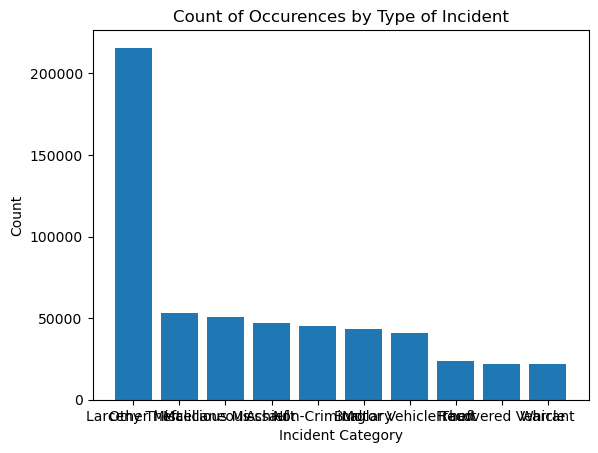

In [76]:
#finding the count of incidents per type
countIncident = city_data_cleaned_df['Incident Category'].value_counts().head(10)


#Idenifty the top 10 reoccuring instances
n = 10
topTen = city_data_cleaned_df['Incident Category'].value_counts()[:n].index.tolist()
print(topTen)


#create a bar chart that shows the top 10 
plt.bar(topTen, countIncident, align = "center")
plt.title('Count of Occurences by Type of Incident')
plt.xlabel('Incident Category')
plt.ylabel('Count')
plt.show()



['Mission', 'Tenderloin', 'South of Market', 'Financial District/South Beach', 'Bayview Hunters Point', 'North Beach', 'Western Addition', 'Sunset/Parkside', 'Castro/Upper Market', 'Nob Hill']


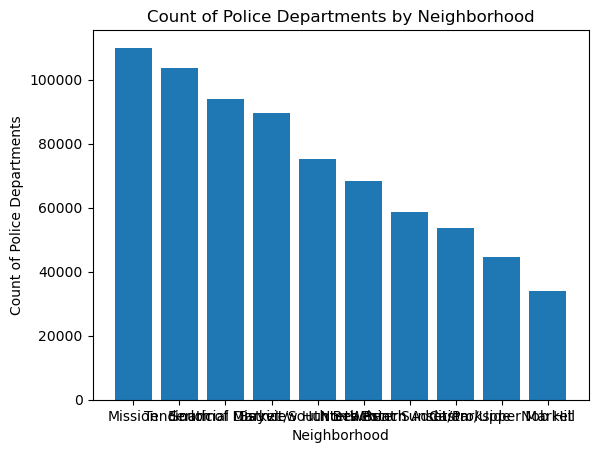

In [77]:
#count of police districts by neighborhood

countStations = city_data_cleaned_df['Police District'].value_counts().head(10)


#Idenifty the top 10 reoccuring instances
n = 10
neighborhood = city_data_cleaned_df['Analysis Neighborhood'].value_counts()[:n].index.tolist()
print(neighborhood)


#create a bar chart that shows the top 10 
plt.bar(neighborhood, countStations, align = "center")
plt.title('Count of Police Departments by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Police Departments')
plt.show()